In [1]:
import numpy as np
import pandas as pd
import pydotplus
from wand.image import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix 
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
def import_data():
    balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+
                                'databases/balance-scale/balance-scale.data', 
                                 sep= ',', header = None)
    print("DataSet length:", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ")
    print(balance_data.head())
    return balance_data

In [3]:
def splitDataSet(balance_data):
    X = balance_data.iloc[:, 1:5]
    Y = balance_data.iloc[:, 0]
    
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                        test_size = 0.3, 
                                                                        random_state = 100)
    return X, Y, X_train, X_test, Y_train, Y_test

In [4]:
def train_using_gini_index(X_train, Y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", 
                                      random_state=100, 
                                      max_depth=3, 
                                      min_samples_leaf=5)
    clf_gini.fit(X_train, Y_train)
    return clf_gini

In [5]:
def prediction(X_test, clf_obj):
    Y_test_pred = clf_obj.predict(X_test)
    print("Predicted Values : ")
    print(Y_test_pred)
    return Y_test_pred

In [21]:
def calculate_accuracy(Y_test, Y_test_pred):
    print("Confusion matrix \n", confusion_matrix(Y_test, Y_test_pred))
    print("Accuracy : ", accuracy_score(Y_test, Y_test_pred) * 100)
    print("Report : \n", classification_report(Y_test, Y_test_pred)) 

DataSet length: 625
Dataset Shape:  (625, 5)
Dataset: 
   0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Result using Gini Index :
Predicted Values : 
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion matrix 
 [[ 0  6  7]
 [

/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


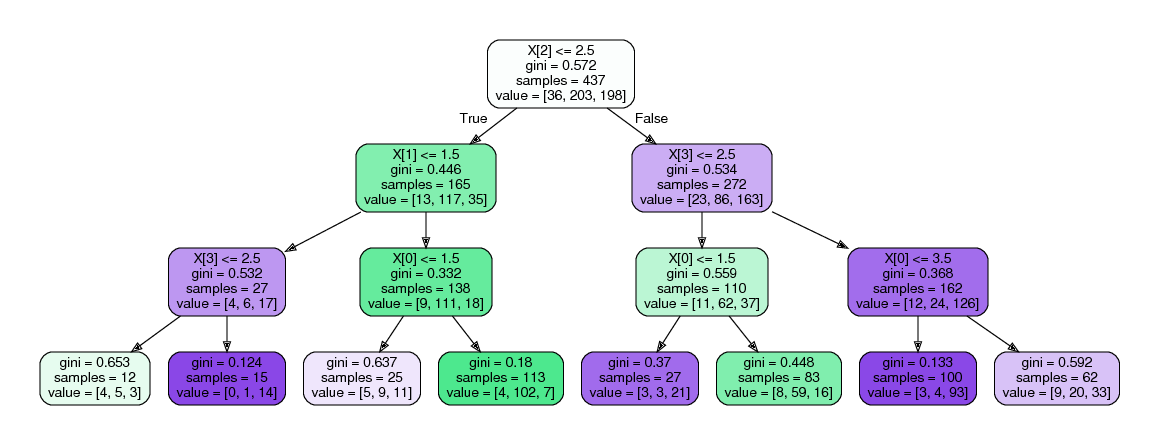

In [39]:
data = import_data()
X, Y, X_train, X_test, Y_train, Y_test = splitDataSet(data)

print("Result using Gini Index :")
clf_gini = train_using_gini_index(X_train, Y_train)
Y_test_pred = prediction(X_test, clf_gini)
calculate_accuracy(Y_test, Y_test_pred)


dot_data = export_graphviz(clf_gini, out_file=None, filled=True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("gfg_example.pdf")

img = Image(filename= "gfg_example.pdf")
img